In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("preprocessed_train.csv", encoding="euc-kr")

In [3]:
df_train

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,2018,13.938057,28127,5.940442,0,70,0,11,...,246,186,206,235,88,33,81,58,61,72
9996,9997,0,1105,16.437104,18163,5.766962,0,11,0,3,...,199,57,134,123,20,25,28,25,41,13
9997,9998,0,4,58.500000,234,3.811827,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,9999,1,3312,24.939312,82599,5.834730,0,39,0,8,...,438,985,806,851,113,123,181,100,75,86


## 1. 결측값 찾기

In [4]:
df_train.isnull()

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_train.isnull().sum()

분석데이터         0
label         0
numstrings    0
avlength      0
printables    0
             ..
dist_91       0
dist_92       0
dist_93       0
dist_94       0
dist_95       0
Length: 618, dtype: int64

In [6]:
df_train.isnull().sum().sort_values(ascending=False)

분석데이터      0
b_148      0
b_141      0
b_142      0
b_143      0
          ..
a_197      0
a_198      0
a_199      0
a_200      0
dist_95    0
Length: 618, dtype: int64

결측 값은 없는 것으로 확인됨

## 2. 모든 값이 0인 column 찾기

In [7]:
df_train == 0

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,True,False,True,True,True
1,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,True,False,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
9998,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
(df_train == 0).all()

분석데이터         False
label         False
numstrings    False
avlength      False
printables    False
              ...  
dist_91       False
dist_92       False
dist_93       False
dist_94       False
dist_95       False
Length: 618, dtype: bool

In [9]:
df_train.columns[(df_train == 0).all()]

Index([], dtype='object')

모든 값이 0인 column도 업음

### 데이터의 분포도 확인

In [10]:
target = df_train['label']

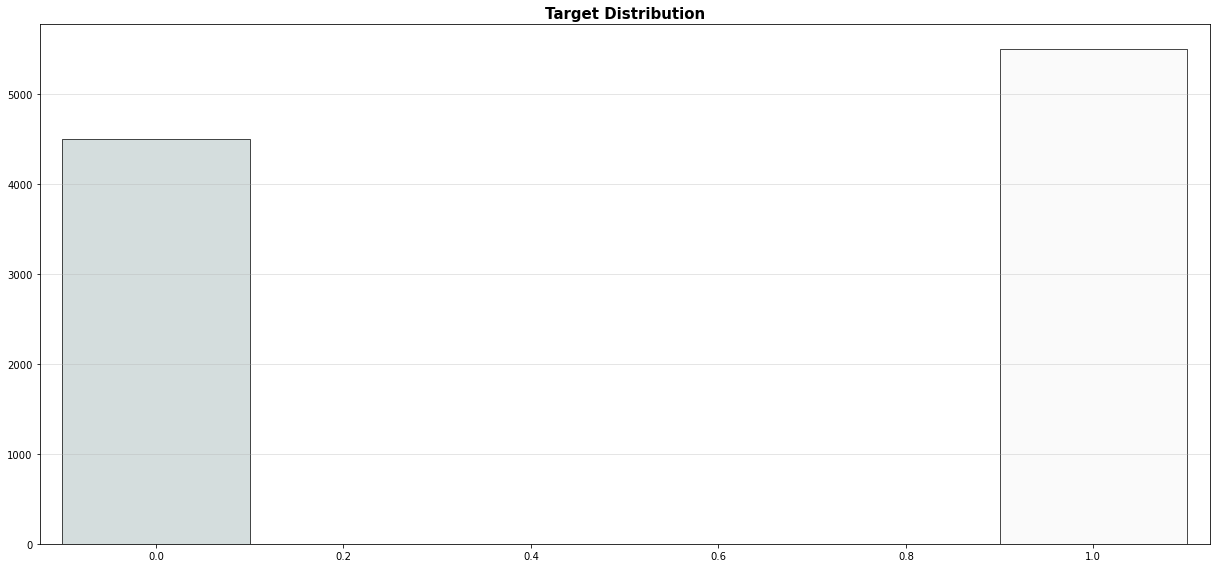

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))

target_cnt = df_train['label'].value_counts().sort_index()

ax.bar(target_cnt.index, target_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(9)],
       width=0.2, 
       edgecolor='black', 
       linewidth=0.7)

ax.margins(0.02, 0.05)

ax.set_title('Target Distribution', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

fig.tight_layout()
plt.show()

In [12]:
target_cnt_df = pd.DataFrame(target_cnt)
target_cnt_df['ratio(%)'] = target_cnt_df/target_cnt.sum()*100
target_cnt_df.sort_values('ratio(%)', ascending=False, inplace=True)
target_cnt_df['cummulated_sum(%)'] = target_cnt_df['ratio(%)'].cumsum()
target_cnt_df.style.bar(subset=['cummulated_sum(%)'], color='#205ff2')

,label,ratio(%),cummulated_sum(%)
1,5500,55.000000,55.000000
0,4500,45.000000,100.000000


In [13]:
df_train.drop(columns=['분석데이터'], axis=1)

,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,144,12.298611,1771,5.356616,0,0,0,1,2399,...,10,4,10,9,4,0,1,0,0,0
1,1,804,9.580846,7703,6.063542,0,0,0,6,183376,...,43,121,84,78,47,36,40,45,27,36
2,0,2205,12.736054,28083,6.107050,9,0,0,6,1178,...,326,268,239,286,199,148,154,37,48,36
3,0,2602,10.288240,26770,5.373013,8,0,0,1,56851,...,336,230,206,245,76,0,26,702,1,5
4,1,8980,23.252339,208806,5.775223,0,28,16,3,124274,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2018,13.938057,28127,5.940442,0,70,0,11,255044,...,246,186,206,235,88,33,81,58,61,72
9996,0,1105,16.437104,18163,5.766962,0,11,0,3,181296,...,199,57,134,123,20,25,28,25,41,13
9997,0,4,58.500000,234,3.811827,0,0,0,1,68736,...,0,0,0,0,0,0,0,0,0,0
9998,1,3312,24.939312,82599,5.834730,0,39,0,8,90648,...,438,985,806,851,113,123,181,100,75,86


In [14]:
df_train = df_train.drop(columns=['분석데이터'], axis=1)

In [15]:
df_train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
label,10000.000000,0.550000,0.497519,0.000000,0.000000,1.000000,1.000000,1.000000
numstrings,10000.000000,7621.989900,16092.005358,2.000000,415.000000,2211.500000,6897.000000,419974.000000
avlength,10000.000000,32.923504,562.748041,5.212620,7.714984,12.529612,18.178302,54476.277500
printables,10000.000000,118864.851700,357614.691704,45.000000,5313.250000,24098.500000,88989.250000,21790511.000000
entropy,10000.000000,5.752056,0.732330,0.179707,5.432412,5.833999,6.346307,6.584918
paths,10000.000000,2.503300,100.323858,0.000000,0.000000,0.000000,1.000000,9897.000000
urls,10000.000000,10.695300,44.882713,0.000000,0.000000,0.000000,2.000000,2221.000000
registry,10000.000000,0.407900,2.358617,0.000000,0.000000,0.000000,0.000000,79.000000
MZ,10000.000000,17.634300,73.924030,1.000000,1.000000,3.000000,12.000000,5266.000000
a_0,10000.000000,192023.542800,1005030.269814,551.000000,17123.500000,43053.500000,138702.500000,32023136.000000


In [16]:
discrete_features = []

for col in df_train.columns:
    if np.array_equal(df_train[col].values, df_train[col].values.astype(int)):
        discrete_features.append(col)

print(f'Total {len(discrete_features)} : ')
print(discrete_features)

Total 615 : 
['label', 'numstrings', 'printables', 'paths', 'urls', 'registry', 'MZ', 'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6', 'a_7', 'a_8', 'a_9', 'a_10', 'a_11', 'a_12', 'a_13', 'a_14', 'a_15', 'a_16', 'a_17', 'a_18', 'a_19', 'a_20', 'a_21', 'a_22', 'a_23', 'a_24', 'a_25', 'a_26', 'a_27', 'a_28', 'a_29', 'a_30', 'a_31', 'a_32', 'a_33', 'a_34', 'a_35', 'a_36', 'a_37', 'a_38', 'a_39', 'a_40', 'a_41', 'a_42', 'a_43', 'a_44', 'a_45', 'a_46', 'a_47', 'a_48', 'a_49', 'a_50', 'a_51', 'a_52', 'a_53', 'a_54', 'a_55', 'a_56', 'a_57', 'a_58', 'a_59', 'a_60', 'a_61', 'a_62', 'a_63', 'a_64', 'a_65', 'a_66', 'a_67', 'a_68', 'a_69', 'a_70', 'a_71', 'a_72', 'a_73', 'a_74', 'a_75', 'a_76', 'a_77', 'a_78', 'a_79', 'a_80', 'a_81', 'a_82', 'a_83', 'a_84', 'a_85', 'a_86', 'a_87', 'a_88', 'a_89', 'a_90', 'a_91', 'a_92', 'a_93', 'a_94', 'a_95', 'a_96', 'a_97', 'a_98', 'a_99', 'a_100', 'a_101', 'a_102', 'a_103', 'a_104', 'a_105', 'a_106', 'a_107', 'a_108', 'a_109', 'a_110', 'a_111', 'a_112', 'a_113'

In [17]:
for dcol in discrete_features:
    print(f'{dcol} unique value : {df_train[dcol].nunique()}')

label unique value : 2
numstrings unique value : 4830
printables unique value : 7878
paths unique value : 65
urls unique value : 231
registry unique value : 34
MZ unique value : 244
a_0 unique value : 7771
a_1 unique value : 5599
a_2 unique value : 4994
a_3 unique value : 4828
a_4 unique value : 5209
a_5 unique value : 4449
a_6 unique value : 4360
a_7 unique value : 4263
a_8 unique value : 5088
a_9 unique value : 4007
a_10 unique value : 4222
a_11 unique value : 3913
a_12 unique value : 4709
a_13 unique value : 4060
a_14 unique value : 3834
a_15 unique value : 4700
a_16 unique value : 4924
a_17 unique value : 3959
a_18 unique value : 3760
a_19 unique value : 3713
a_20 unique value : 4276
a_21 unique value : 4259
a_22 unique value : 3676
a_23 unique value : 3545
a_24 unique value : 4173
a_25 unique value : 3613
a_26 unique value : 3495
a_27 unique value : 3522
a_28 unique value : 4121
a_29 unique value : 3524
a_30 unique value : 3509
a_31 unique value : 3620
a_32 unique value : 5186
a_3

b_65 unique value : 876
b_66 unique value : 777
b_67 unique value : 714
b_68 unique value : 855
b_69 unique value : 694
b_70 unique value : 809
b_71 unique value : 717
b_72 unique value : 725
b_73 unique value : 524
b_74 unique value : 507
b_75 unique value : 502
b_76 unique value : 612
b_77 unique value : 526
b_78 unique value : 626
b_79 unique value : 1437
b_80 unique value : 2711
b_81 unique value : 1056
b_82 unique value : 976
b_83 unique value : 932
b_84 unique value : 1205
b_85 unique value : 956
b_86 unique value : 1114
b_87 unique value : 949
b_88 unique value : 897
b_89 unique value : 666
b_90 unique value : 664
b_91 unique value : 659
b_92 unique value : 781
b_93 unique value : 718
b_94 unique value : 816
b_95 unique value : 1611
b_96 unique value : 3567
b_97 unique value : 1470
b_98 unique value : 1455
b_99 unique value : 1334
b_100 unique value : 1730
b_101 unique value : 1310
b_102 unique value : 1747
b_103 unique value : 1488
b_104 unique value : 1183
b_105 unique value :

In [18]:
paths_label = df_train.groupby(['urls'])['label'].mean().sort_values()
print((paths_label == 0).sum())

53


In [31]:
df_train.groupby(['urls'])['label'].mean()

urls
0       0.550664
1       0.564193
2       0.519651
3       0.508333
4       0.588889
          ...   
564     1.000000
700     0.000000
900     0.000000
1371    0.000000
2221    0.000000
Name: label, Length: 231, dtype: float64

In [34]:
df_train.groupby(['urls'])['label'].groups

{0: [0, 1, 2, 3, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 53, 55, 57, 58, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 83, 84, 85, 86, 89, 90, 92, 93, 94, 96, 97, 100, 101, 102, 103, 105, 106, 107, 109, 110, 111, 112, 115, 118, 120, 121, 122, 123, 125, 128, 130, 132, 133, 134, 135, 137, 138, 140, 141, 143, 144, 145, ...], 1: [20, 29, 44, 56, 60, 88, 104, 108, 127, 129, 142, 153, 188, 253, 266, 284, 328, 332, 384, 394, 419, 444, 454, 461, 462, 466, 481, 498, 499, 527, 547, 549, 551, 554, 577, 594, 603, 607, 653, 656, 659, 691, 693, 696, 704, 712, 715, 735, 740, 746, 747, 764, 803, 815, 851, 853, 854, 863, 885, 896, 900, 907, 912, 921, 952, 958, 966, 1018, 1032, 1033, 1037, 1049, 1061, 1065, 1097, 1106, 1120, 1165, 1168, 1179, 1183, 1211, 1217, 1219, 1252, 1264, 1267, 1270, 1304, 1311, 1316, 1337, 1340, 1352, 1356, 1394, 1406, 1423, 1425, 1426, ...], 2: [8, 91, 166, 185, 201, 22

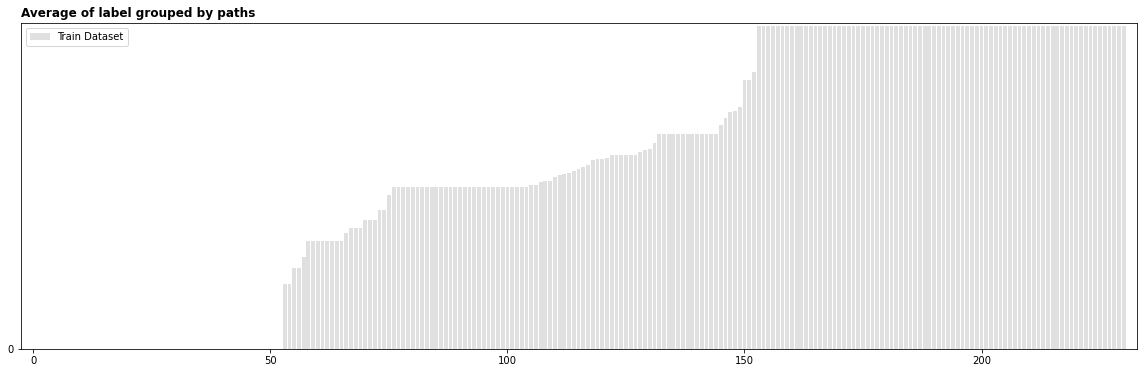

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.bar(range(len(paths_label)), paths_label, alpha=0.7, color='lightgray', label='Train Dataset')
ax.set_yticks(range(0, 1))
ax.margins(0.01)
ax.grid(axis='y', linestyle='--', zorder=5)
ax.set_title('Average of label grouped by paths', loc='left', fontweight='bold')
ax.legend()
plt.show()